<a href="https://colab.research.google.com/github/utkarshzy/EDA_project_22BDS0157/blob/main/22bds0157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Registration Number - 22BDS0157

In [41]:
# NAME - Utkarsh Singh

In [3]:
# https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Hitters.csv

In [42]:
# https://github.com/utkarshzy/EDA_project_22BDS0157/blob/main/22BDS0157.ipynb

In [4]:
# import necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [5]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Hitters.csv"
df = pd.read_csv(url)
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
# Dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

# Info about each column
df.info()

# Statistical summary of numerical columns
df.describe()

# Summary for categorical columns
print("\n Categorical Summary")
print(df.describe(include=['object']))


Dataset Shape: (322, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null  

In [7]:
# Data Handling (Missing Values)
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [8]:
# Data Cleaning

# Drop rows with missing values
df = df.dropna()

# Reset index
df.reset_index(drop=True, inplace=True)

print("\nShape after cleaning:", df.shape)
print("Missing values after cleaning:", df.isnull().sum().sum())



Shape after cleaning: (263, 20)
Missing values after cleaning: 0


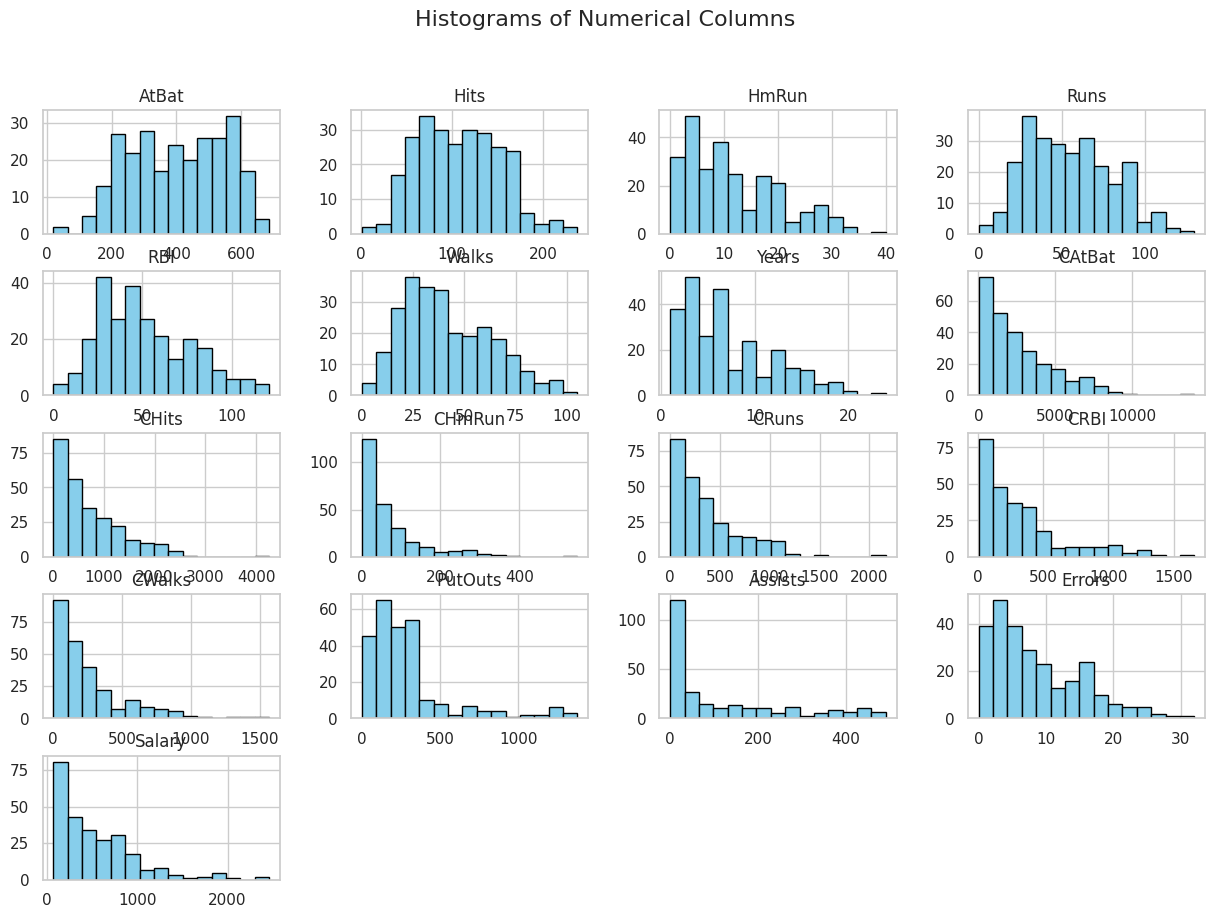

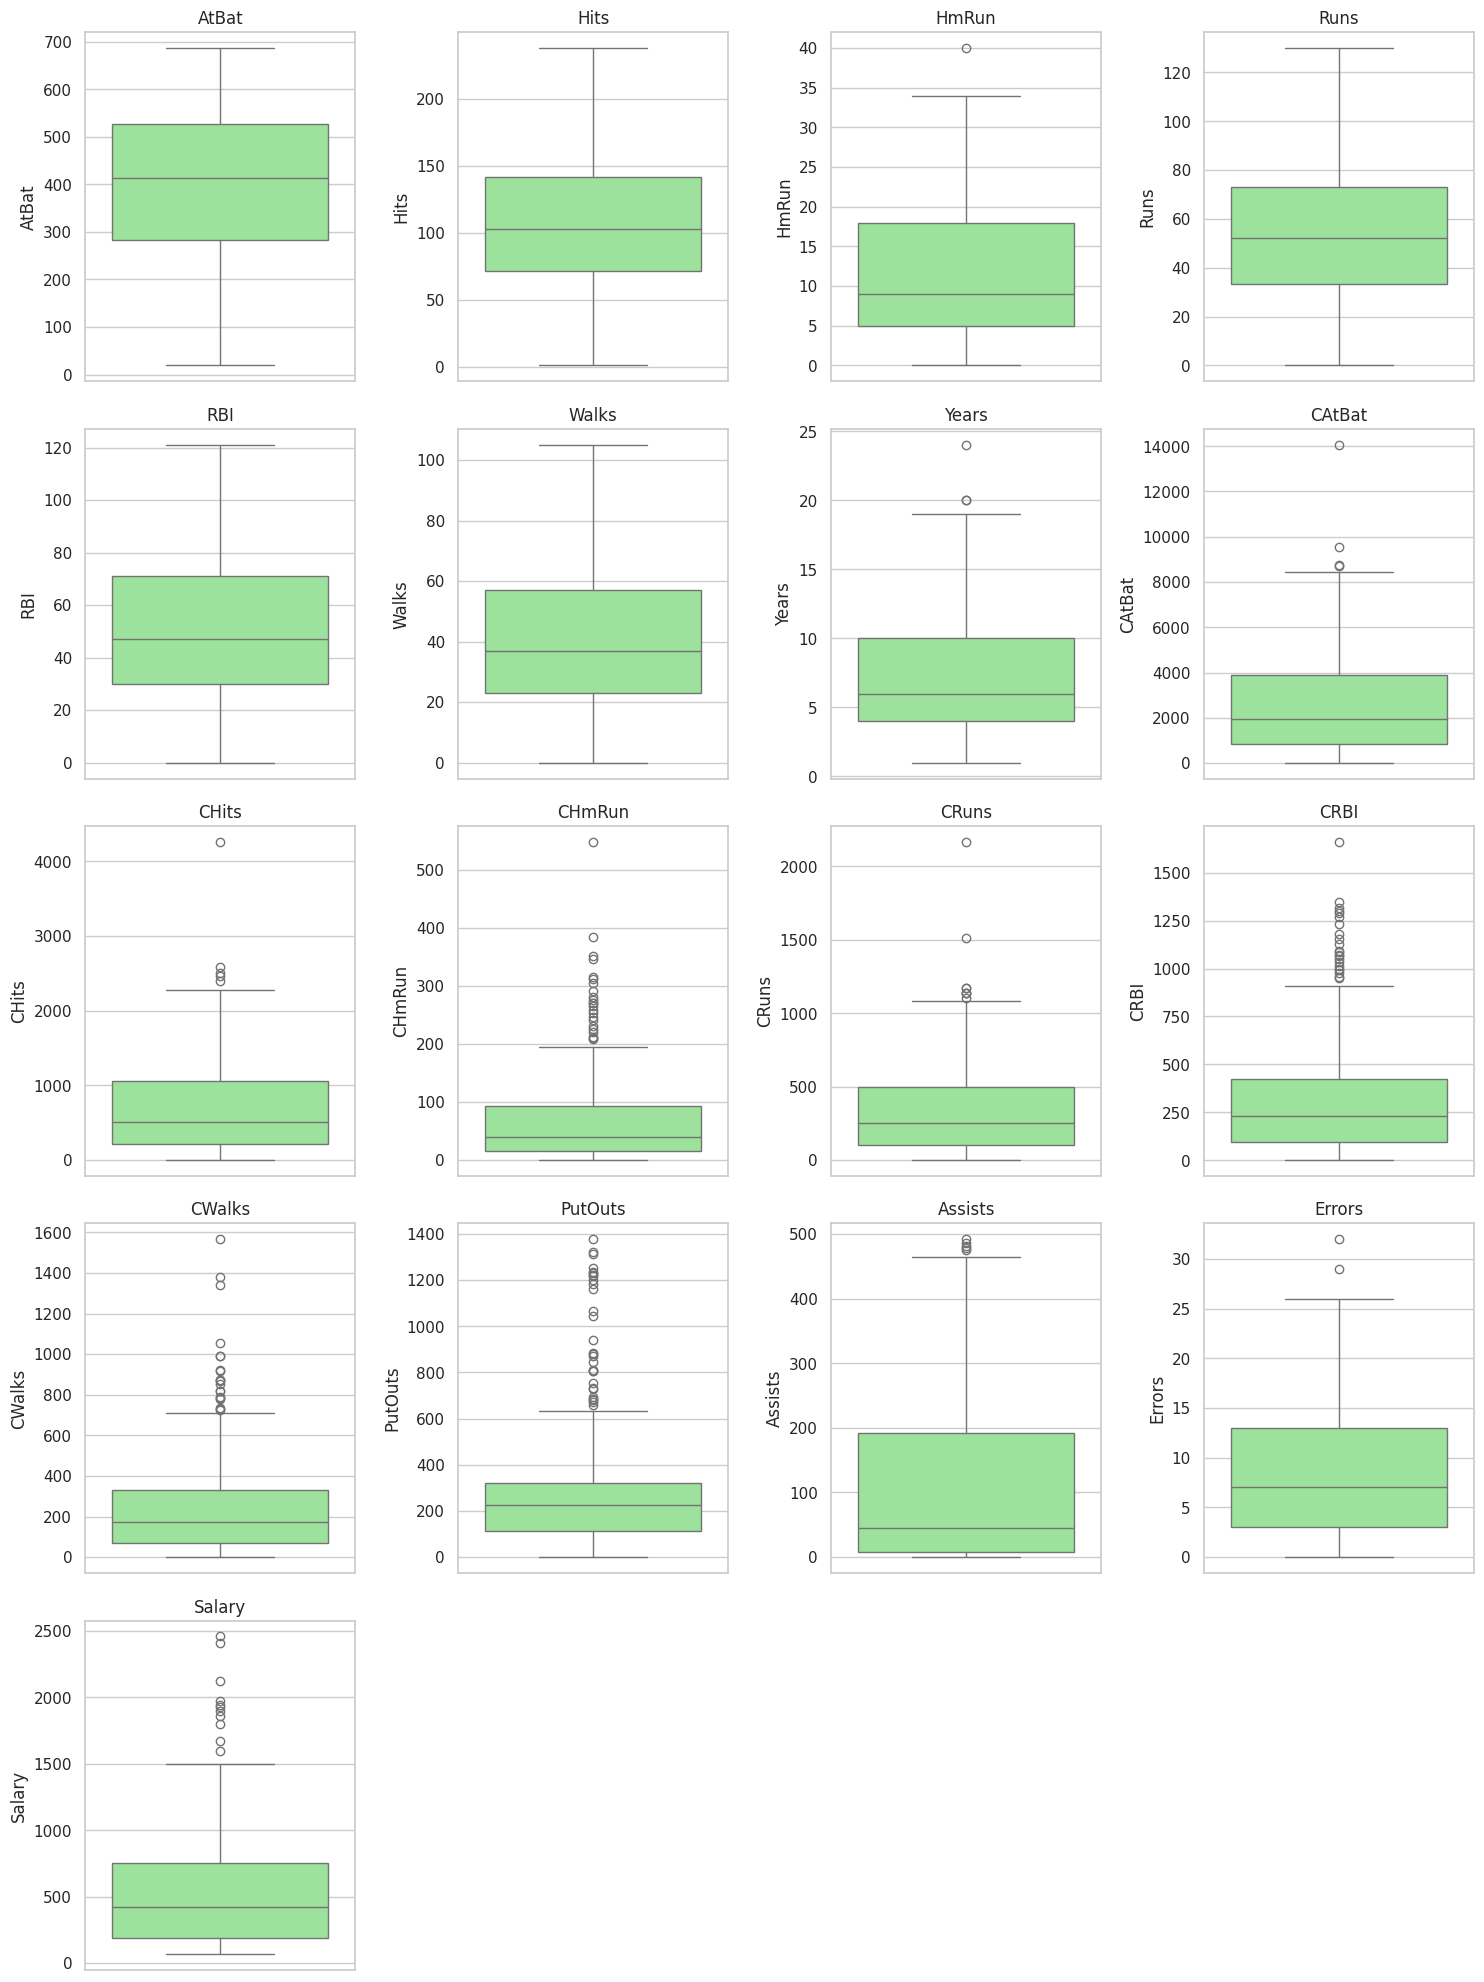

In [9]:
## Univariate Analysis (Numerical Variables)

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms
df[num_cols].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

# Boxplots (dynamic subplot size)
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


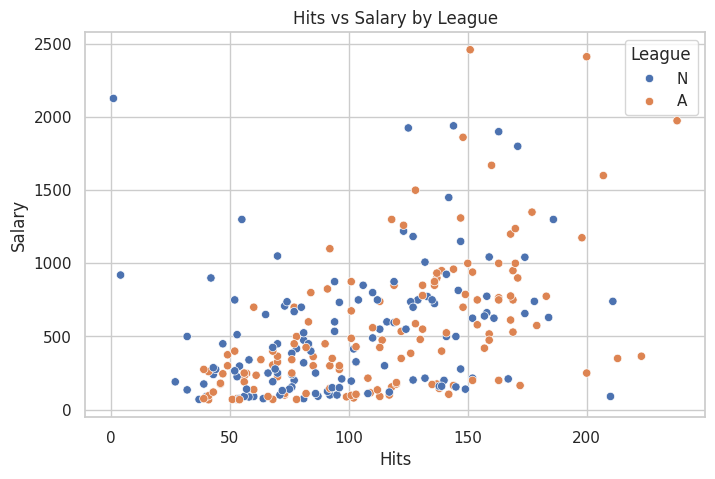

/tmp/ipython-input-1446886326.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='League', y='Salary', data=df, palette="Set2")


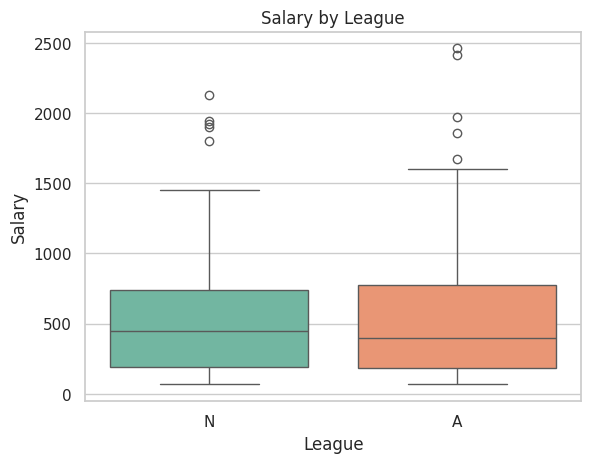

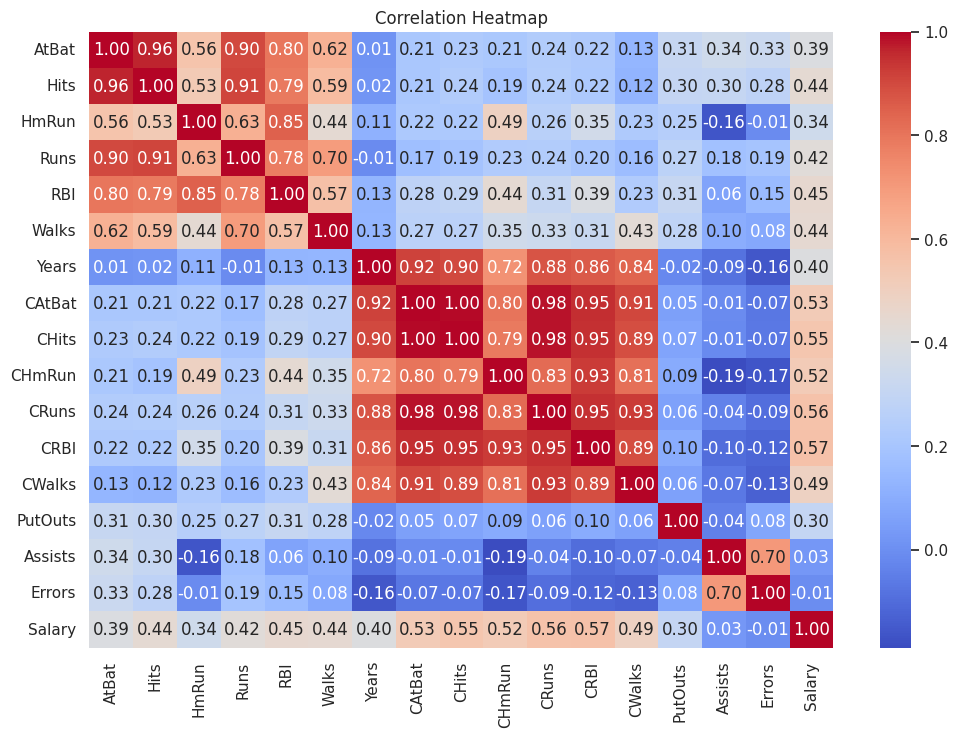

In [10]:
## Bivariate Analysis

# Scatterplot: Hits vs Salary by League
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hits', y='Salary', data=df, hue='League')
plt.title("Hits vs Salary by League")
plt.show()

# Boxplot: Salary distribution by League
sns.boxplot(x='League', y='Salary', data=df, palette="Set2")
plt.title("Salary by League")
plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



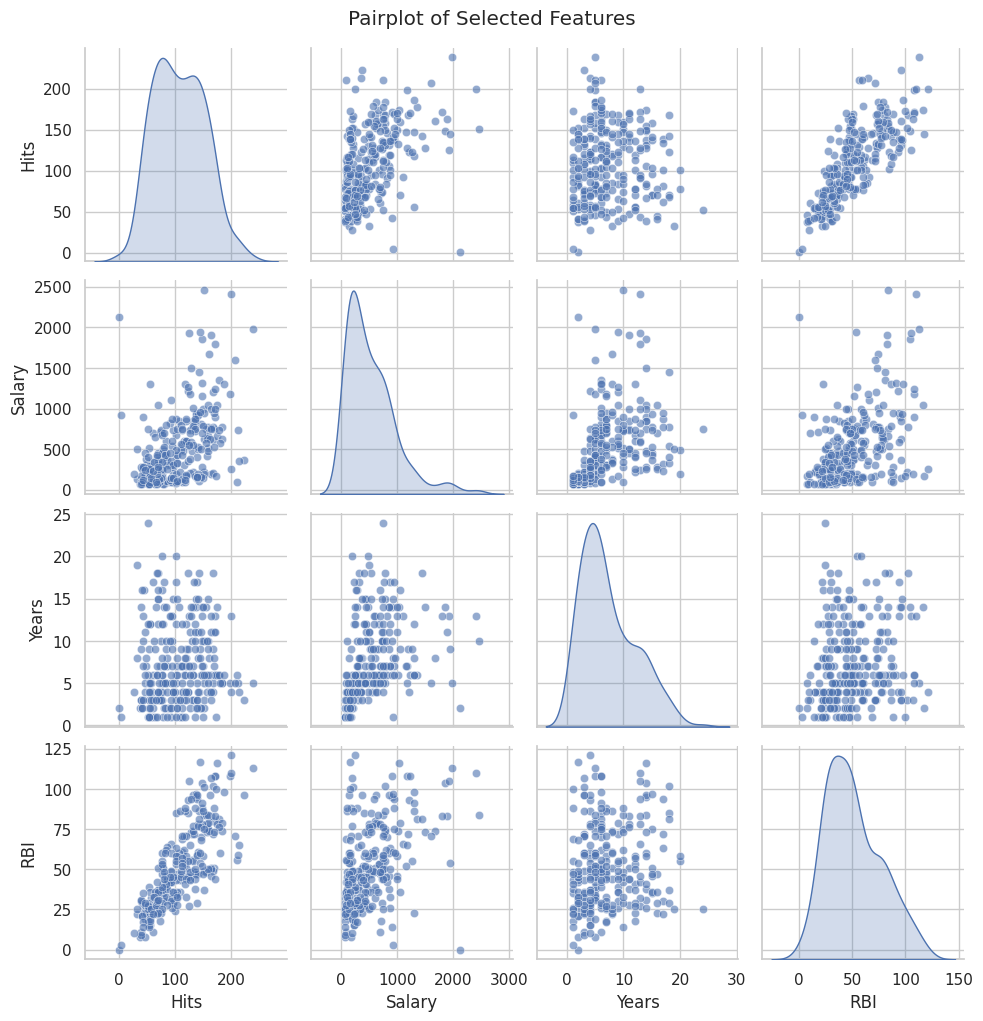

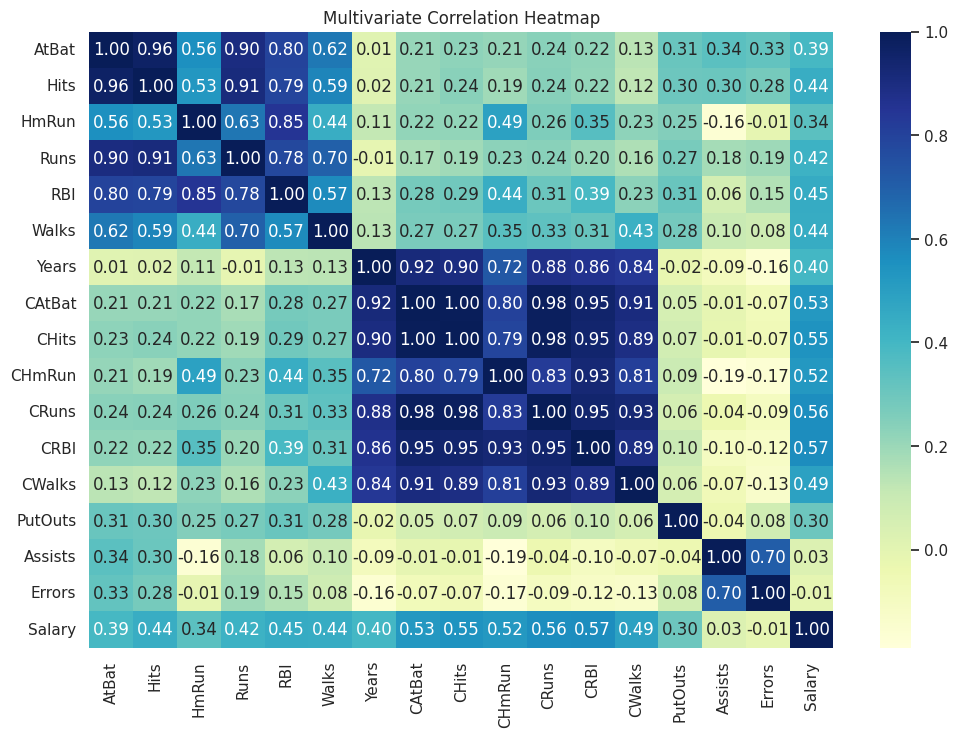

In [11]:
## Multivariate Analysis

# Pairplot
selected_cols = ['Hits', 'Salary', 'Years', 'RBI']
sns.pairplot(df[selected_cols], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Multivariate Heatmap
plt.figure(figsize=(12, 8))
multi_corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(multi_corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Multivariate Correlation Heatmap")
plt.show()


In [12]:
# 1D analysis

In [13]:
col = 'Salary'
data = df[col].values

# Arithmetic Mean
mean_val = np.mean(data)

# Weighted Arithmetic Mean (weights = uniform here)
weights = np.repeat(1, len(data))
wmean_val = np.average(data, weights=weights)

# Quadratic Mean (RMS)
qmean_val = np.sqrt(np.mean(data**2))

# Harmonic Mean
hmean_val = stats.hmean(data)

# Geometric Mean
gmean_val = stats.gmean(data)

# Median
median_val = np.median(data)

# Mode
mode_val = stats.mode(data, keepdims=True).mode[0]

print("Arithmetic Mean:", mean_val)
print("Weighted Mean:", wmean_val)
print("Quadratic Mean:", qmean_val)
print("Harmonic Mean:", hmean_val)
print("Geometric Mean:", gmean_val)
print("Median:", median_val)
print("Mode:", mode_val)


Arithmetic Mean: 535.9258821292775
Weighted Mean: 535.9258821292775
Quadratic Mean: 699.9648707573771
Harmonic Mean: 254.0826246517568
Geometric Mean: 375.1108345949681
Median: 425.0
Mode: 750.0


In [14]:
# Quartiles
quartiles = np.quantile(data, [0.25, 0.5, 0.75])

# Deciles
deciles = np.quantile(data, np.linspace(0.1, 0.9, 9))

# Percentiles
percentiles = np.quantile(data, np.linspace(0.01, 0.99, 99))

print("Quartiles:", quartiles)
print("Deciles:", deciles)
print("Percentiles (1-99):", percentiles[:5], "...")


Quartiles: [190. 425. 750.]
Deciles: [ 100.      155.      221.      300.      425.      538.      700.
  809.     1048.6666]
Percentiles (1-99): [70.  70.  75.  75.  86.6] ...


In [15]:
# Range
rng = np.ptp(data)

# Interquartile Range
iqr = stats.iqr(data)

# Interdecile Range
deciles_10_90 = np.quantile(data, [0.1, 0.9])
interdecile = deciles_10_90[1] - deciles_10_90[0]

# Standard Deviation
std_val = np.std(data, ddof=1)

# Variance
var_val = np.var(data, ddof=1)

print("Range:", rng)
print("IQR:", iqr)
print("Interdecile Range:", interdecile)
print("Standard Deviation:", std_val)
print("Variance:", var_val)


Range: 2392.5
IQR: 560.0
Interdecile Range: 948.6666
Standard Deviation: 451.11868070253865
Variance: 203508.06407879904


In [16]:
# Skewness & Kurtosis
skew_val = stats.skew(data)
kurt_val = stats.kurtosis(data)

print("Skewness:", skew_val)
print("Kurtosis:", kurt_val)


Skewness: 1.5798904059105168
Kurtosis: 2.9783909683575223



Relative Frequency Distribution:
 (65.108, 546.0]     0.600760
(546.0, 1024.5]     0.288973
(1024.5, 1503.0]    0.068441
(1503.0, 1981.5]    0.030418
(1981.5, 2460.0]    0.011407
Name: proportion, dtype: float64


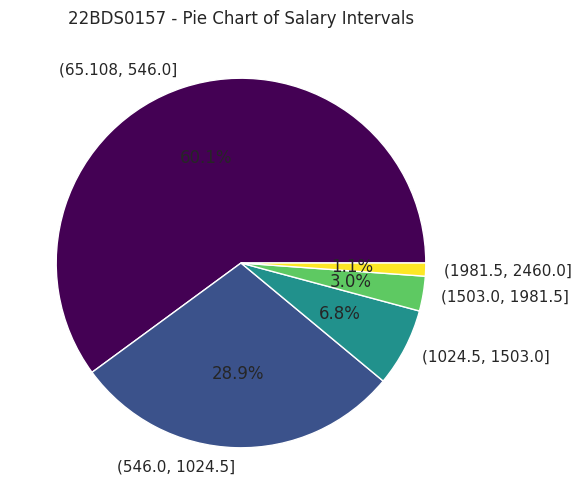

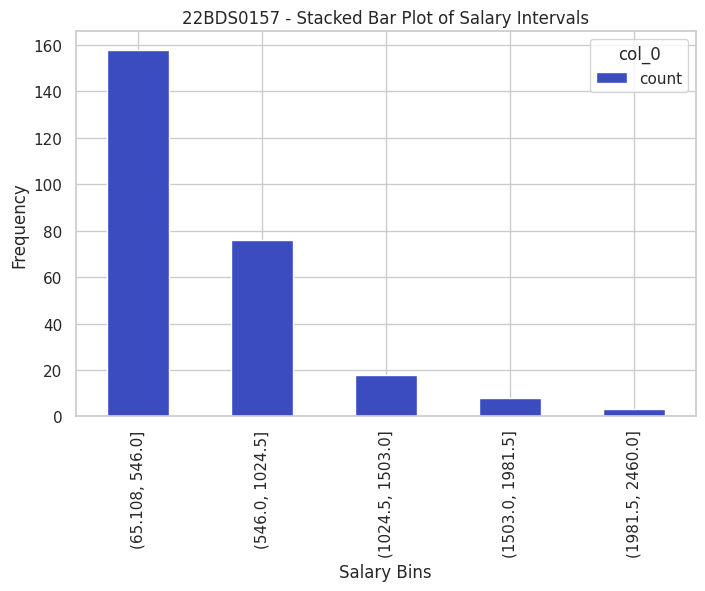

In [17]:
# Relative Frequency Distribution
rel_freq = pd.Series(pd.cut(data, bins=5)).value_counts(normalize=True)
print("\nRelative Frequency Distribution:\n", rel_freq)

# Pie Chart
rel_freq.plot.pie(autopct="%.1f%%", colormap="viridis", figsize=(6,6))
plt.title("22BDS0157 - Pie Chart of Salary Intervals")
plt.ylabel("")
plt.show()

# Stacked Bar Plot
categories = pd.cut(data, bins=5)
ct = pd.crosstab(index=categories, columns="count")
ct.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("22BDS0157 - Stacked Bar Plot of Salary Intervals")
plt.xlabel("Salary Bins")
plt.ylabel("Frequency")
plt.show()


In [18]:
# 2-D and 3-D Analysis

In [19]:
# Converting categorical columns
for col in ['League', 'Division', 'NewLeague']:
    df[col] = df[col].astype('category')

# Ensure numerical columns are float
num_cols = ['Salary','Hits','Years','RBI']
df[num_cols] = df[num_cols].astype(float)

print(df.dtypes.head(10))


AtBat       int64
Hits      float64
HmRun       int64
Runs        int64
RBI       float64
Walks       int64
Years     float64
CAtBat      int64
CHits       int64
CHmRun      int64
dtype: object


In [20]:
# Categorical vs Categorical
cont_cat = pd.crosstab(df['League'], df['Division'])
print("\nTwo-way table: League vs Division\n", cont_cat)

# Numerical vs Numerical - Correlation matrix
print("\nCorrelation (Numerical vs Numerical):\n", df[num_cols].corr())

# Categorical vs Numerical - Group means
group_mean = df.groupby('League')['Salary'].mean()
print("\nAverage Salary by League:\n", group_mean)

# Three-way contingency: League, Division, NewLeague
three_way = pd.crosstab([df['League'], df['Division']], df['NewLeague'])
print("\nThree-way contingency table:\n", three_way)




Two-way table: League vs Division
 Division   E   W
League          
A         68  71
N         61  63

Correlation (Numerical vs Numerical):
           Salary      Hits     Years       RBI
Salary  1.000000  0.438675  0.400657  0.449457
Hits    0.438675  1.000000  0.018598  0.788478
Years   0.400657  0.018598  1.000000  0.129668
RBI     0.449457  0.788478  0.129668  1.000000

Average Salary by League:
 League
A    541.999547
N    529.117500
Name: Salary, dtype: float64

Three-way contingency table:
 NewLeague         A   N
League Division        
A      E         64   4
       W         67   4
N      E          5  56
       W          5  58


/tmp/ipython-input-804742439.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = df.groupby('League')['Salary'].mean()


In [21]:
from scipy.stats import chi2_contingency

# Example table: League vs Division
table = pd.crosstab(df['League'], df['Division'])

# Row profiles
row_profiles = table.div(table.sum(axis=1), axis=0)

# Column profiles
col_profiles = table.div(table.sum(axis=0), axis=1)

# Relative frequencies
rel_freq = table / table.values.sum()

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("\nContingency Table:\n", table)
print("\nRow Profiles:\n", row_profiles)
print("\nColumn Profiles:\n", col_profiles)
print("\nRelative Frequencies:\n", rel_freq)
print("\nChi-square Value:", chi2, "  p-value:", p)



Contingency Table:
 Division   E   W
League          
A         68  71
N         61  63

Row Profiles:
 Division         E         W
League                      
A         0.489209  0.510791
N         0.491935  0.508065

Column Profiles:
 Division         E         W
League                      
A         0.527132  0.529851
N         0.472868  0.470149

Relative Frequencies:
 Division         E         W
League                      
A         0.258555  0.269962
N         0.231939  0.239544

Chi-square Value: 0.0   p-value: 1.0


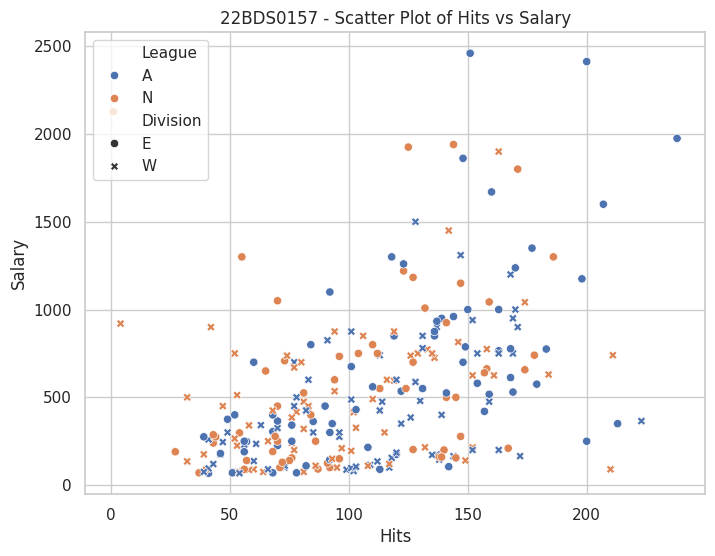

In [22]:
# 2D Scatter Plot (Numerical vs Numerical)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Hits', y='Salary', data=df, hue='League', style='Division')
plt.title("22BDS0157 - Scatter Plot of Hits vs Salary")
plt.xlabel("Hits")
plt.ylabel("Salary")
plt.show()


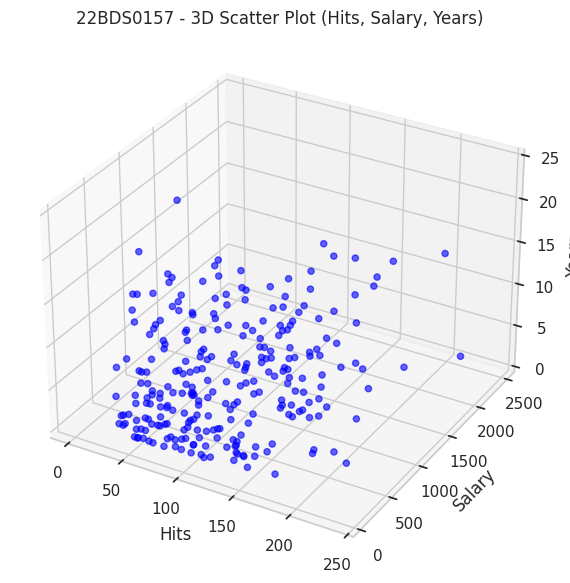

In [23]:
# 3D Scatter Plot (3 Numerical Variables)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hits'], df['Salary'], df['Years'], c='blue', alpha=0.6)

ax.set_xlabel("Hits")
ax.set_ylabel("Salary")
ax.set_zlabel("Years")
ax.set_title("22BDS0157 - 3D Scatter Plot (Hits, Salary, Years)")
plt.show()


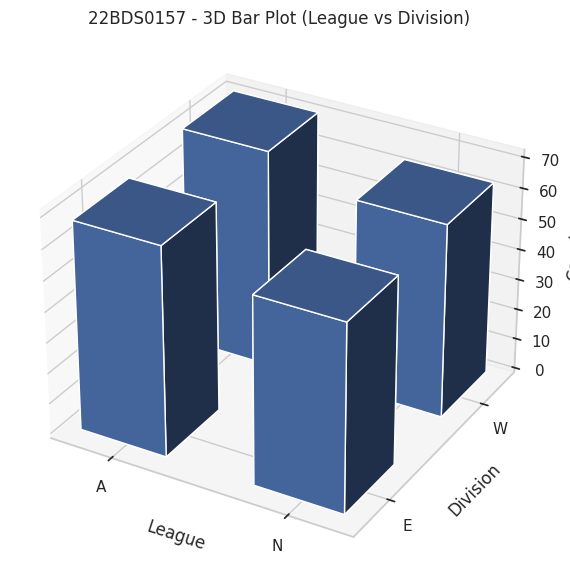

In [24]:
# 3D Bar Plot (Categorical Distribution)

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Contingency table: League vs Division
bar3d = pd.crosstab(df['League'], df['Division'])

# Prepare grid positions
_x = np.arange(len(bar3d.index))
_y = np.arange(len(bar3d.columns))
_xx, _yy = np.meshgrid(_x, _y, indexing="ij")

x, y = _xx.ravel(), _yy.ravel()
z = np.zeros_like(x)

# Heights of bars
dz = bar3d.values.ravel()

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx=0.5, dy=0.5, dz=dz, shade=True)

# Axis labels
ax.set_xticks(_x + 0.25)
ax.set_xticklabels(bar3d.index)
ax.set_yticks(_y + 0.25)
ax.set_yticklabels(bar3d.columns)

ax.set_xlabel("League")
ax.set_ylabel("Division")
ax.set_zlabel("Count")
ax.set_title("22BDS0157 - 3D Bar Plot (League vs Division)")

plt.show()


/tmp/ipython-input-533925156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Division', y='Salary', data=df, palette="pastel")


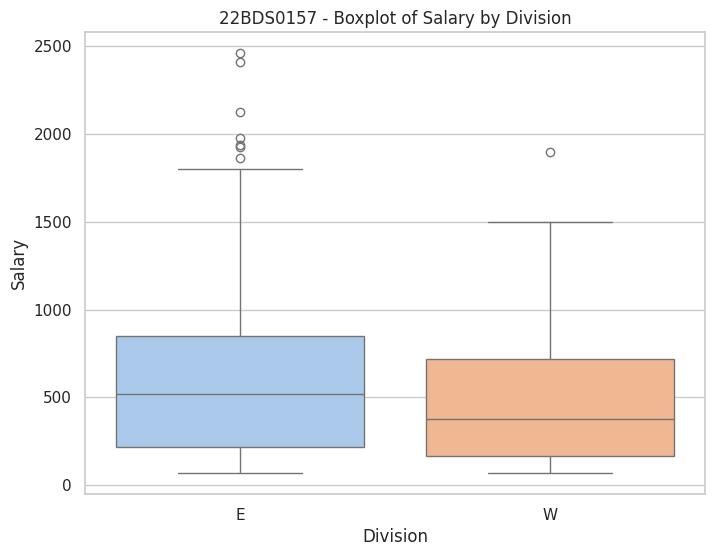

In [25]:
# 2D Boxplot (Categorical vs Numerical)

plt.figure(figsize=(8,6))
sns.boxplot(x='Division', y='Salary', data=df, palette="pastel")
plt.title("22BDS0157 - Boxplot of Salary by Division")
plt.xlabel("Division")
plt.ylabel("Salary")
plt.show()


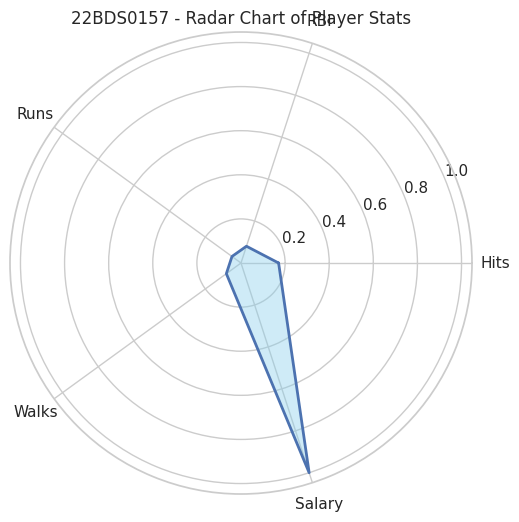

In [26]:
# Radar Chart (Sunray Plot for Multiple Stats)

from math import pi

# Select statistics for one player (first row for example)
stats_cols = ['Hits','RBI','Runs','Walks','Salary']
player = df[stats_cols].iloc[0]

# Normalize data
player_norm = player / player.max()

# Radar chart
categories = list(player_norm.index)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
values = player_norm.values.flatten().tolist()
values += values[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.title("22BDS0157 - Radar Chart of Player Stats")
plt.show()


In [ ]:
# k-means clustering

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
num_cols = ['Salary', 'Years', 'Hits', 'RBI', 'Walks']
X = df[num_cols]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data shape for clustering:", X_scaled.shape)

Data shape for clustering: (263, 5)


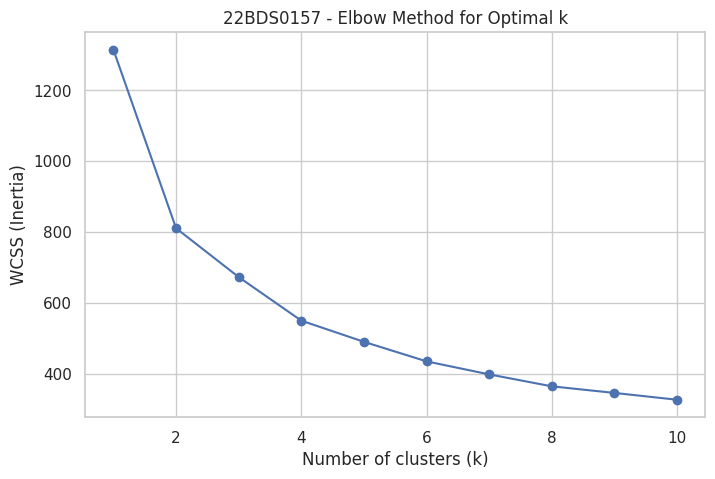

In [28]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("22BDS0157 - Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()


In [29]:
# Applying k-means

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['Salary', 'Years', 'Hits', 'RBI', 'Cluster']].head())

   Salary  Years   Hits   RBI  Cluster
0   475.0   14.0   81.0  38.0        2
1   480.0    3.0  130.0  72.0        1
2   500.0   11.0  141.0  78.0        1
3    91.5    2.0   87.0  42.0        0
4   750.0   11.0  169.0  51.0        1


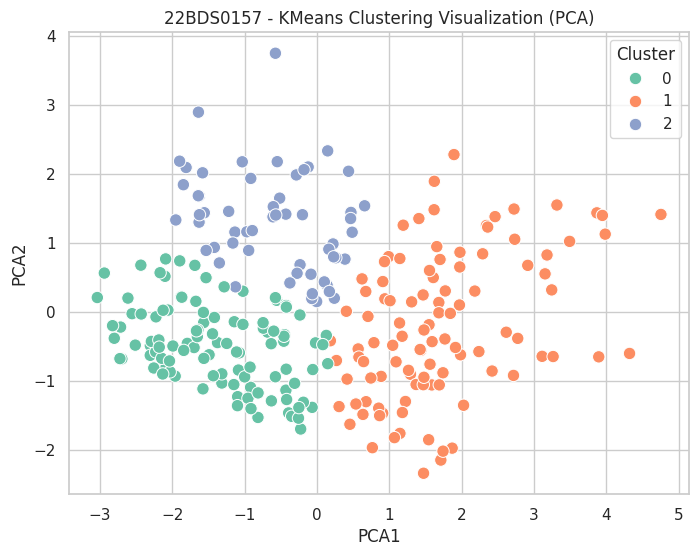

In [30]:
# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette="Set2", s=80)
plt.title("22BDS0157 - KMeans Clustering Visualization (PCA)")
plt.show()


In [31]:
cluster_summary = df.groupby('Cluster')[num_cols].mean()
print("\nCluster Summary:\n", cluster_summary)



Cluster Summary:
              Salary      Years        Hits        RBI      Walks
Cluster                                                         
0        225.533663   3.826923   80.019231  34.673077  29.019231
1        818.574495   8.077670  151.359223  76.407767  58.922330
2        592.497018  12.375000   79.410714  36.875000  30.821429


In [32]:
# PHASE 3

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [34]:
# Data Cleaning
le = LabelEncoder()
for col in ['League', 'Division', 'NewLeague']:
    df[col] = le.fit_transform(df[col])
num_data = df.select_dtypes(include=[np.number])

Explained Variance Ratio: [0.38992632 0.22440144]


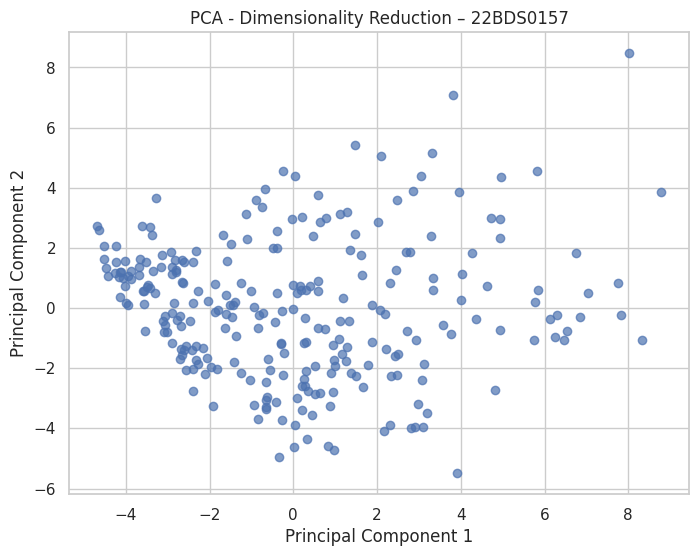

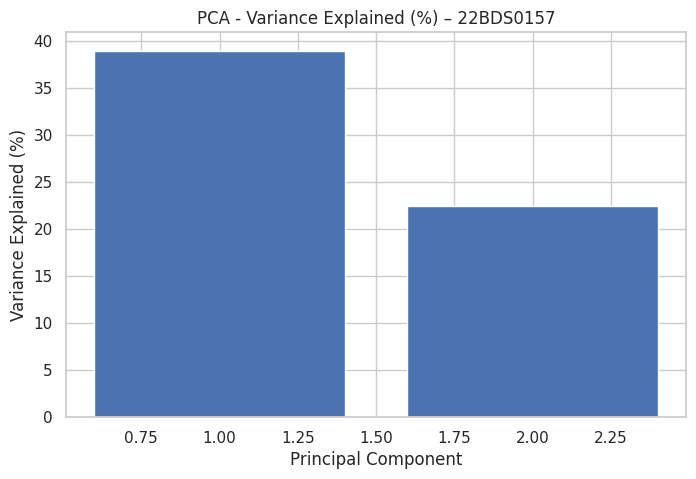

In [35]:
# Principal Component Analysis (PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.7)
plt.title("PCA - Dimensionality Reduction – 22BDS0157")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100)
plt.title("PCA - Variance Explained (%) – 22BDS0157")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.show()


--- Simple Linear Regression (Salary ~ Hits) ---
R² Score: -0.1216
RMSE: 450.4070
MAE: 285.9325


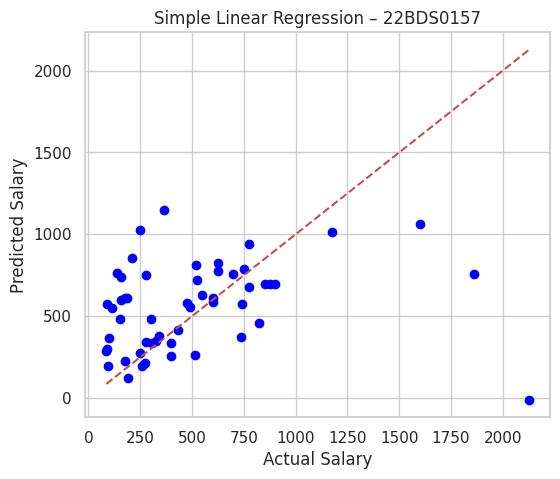

In [36]:
# Simple Linear Regression (SLR)
X_slr = df[['Hits']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred_slr = slr.predict(X_test)
r2_slr = r2_score(y_test, y_pred_slr)
rmse_slr = np.sqrt(mean_squared_error(y_test, y_pred_slr))
mae_slr = mean_absolute_error(y_test, y_pred_slr)
print("\n--- Simple Linear Regression (Salary ~ Hits) ---")
print(f"R² Score: {r2_slr:.4f}")
print(f"RMSE: {rmse_slr:.4f}")
print(f"MAE: {mae_slr:.4f}")
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_slr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Simple Linear Regression – 22BDS0157")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()



--- Multiple Linear Regression (Salary ~ Hits + Runs + Walks + Years + RBI) ---
R² Score: 0.0092
RMSE: 423.3368
MAE: 257.3632


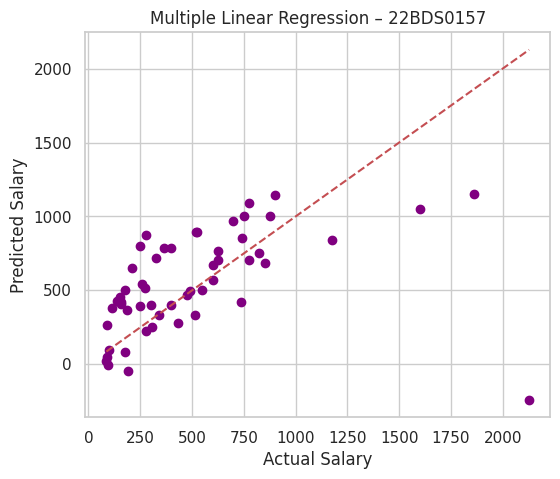

In [37]:
# Multiple Linear Regression (MLR)
features = ['Hits','Runs','Walks','Years','RBI']
X_mlr = df[features]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y, test_size=0.2, random_state=42)
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
r2_mlr = r2_score(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
print("\n--- Multiple Linear Regression (Salary ~ Hits + Runs + Walks + Years + RBI) ---")
print(f"R² Score: {r2_mlr:.4f}")
print(f"RMSE: {rmse_mlr:.4f}")
print(f"MAE: {mae_mlr:.4f}")
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_mlr, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Multiple Linear Regression – 22BDS0157")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

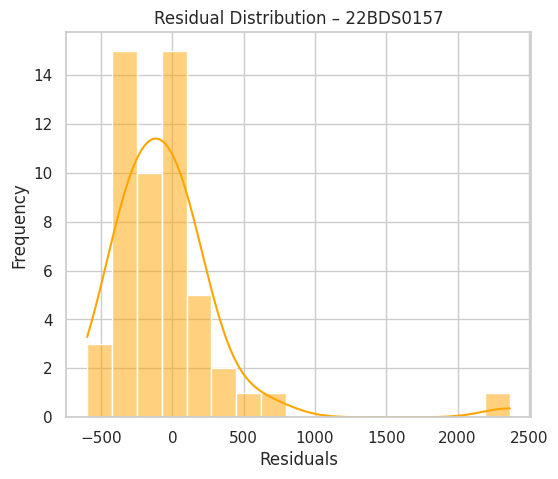


Model evaluation complete.


In [38]:
# Residual Analysis
residuals = y_test - y_pred_mlr
plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution – 22BDS0157")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
print("\nModel evaluation complete.")

In [44]:
!jupyter nbconvert --to html 22BDS0157.ipynb

[NbConvertApp] Converting notebook 22BDS0157.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 2867780 bytes to 22BDS0157.html
